## Tensors Basics

## Why tensors

Tensors can be  understood as a multidimensional  extension of more familiar object like  vectors (1D tensors) or matrices (2D tensors). They  provide  basic building blocks for all known  learning, deep or otherwise, frameworks. 
That is because the data is mostly presented in form of multidimensional tables i.e. tensors.  Also many models have their internal structure expressed in terms of tensors.
So whatever you do, you will be using tensors to manipulate your data. 

Apart for being a very useful mathematical abstraction, the use of tensors is very efficient.  Tensors libraries provide optimized  implementations of tensor operations. This is crucial for interpreted languages like Python. As you will see the difference between "naive" python implementation and  tensor operations can be staggering. This is because those operations are written in C/C++ and compiled to native code. Usually their are optimized for given hardware and use multithreading and/or vector instructions. Without using tensor functions  Python would be to slow for any practical purposes of machine learning. 

That's why being confortable with tensors is absolutelly crucial for any serious machine learning practitioner. We strongly encourage you to experiment with the ideas presented here to be sure that you understand them. 


### numpy

The tensor package for python is `numpy`. Most of other libraries build on top of it. However you must be aware that many machine learning frameworks (e.g. PyTorch) define their own tensors. Usually they provide  functions to convert to and from `numpy` tensors. Also they implement a similar set of functions and operators. That's why in this notebook I will make a quick introduction to `numpy` library. All the main concepts introduced here will translate to any tensor library, but the notation may differ. 

Please note that I will not explain in detail each introduced function or method. You are expected to familiarize yourself with common functions by consulting the documentation. 


Let's start by importing the `numpy` module:

In [23]:
import numpy as np

As already mentioned tensor is a multidimensional table i.e. something that requires several indices to access its elements. If we need $D$ indices we say that the tensor is $D$-dimensional. For example tensor below is 3-dimenional.

$$x_{ijk}$$

Another important feature is dimension size. Each index corresponds to one dimension and the range the index can take is the size of this dimension. In the example below we create a 3-dimensional random tensor, where each tensor element is drawn idependently from gaussian distribution.  The last argument specifies the tensor shape i.e. the number of dimensions and the size of each dimension. Actually the name for tensors in `numpy` is `array` and we will be using this from now on. 

In [24]:
x = np.random.normal(0,1,(3,5,2))
print(x)

[[[-6.83343995e-01 -9.09612038e-01]
  [-9.02442430e-02 -2.81069747e-01]
  [-6.32508322e-01 -7.89631656e-01]
  [ 1.47802366e+00  1.07104783e+00]
  [ 4.81548591e-01 -1.54504678e+00]]

 [[-8.26466379e-01  7.04441949e-01]
  [ 1.56837758e+00  7.26919552e-01]
  [-1.10005505e+00  8.59766108e-01]
  [-1.35183711e+00 -2.34437948e+00]
  [ 2.24192042e-03  1.06821109e+00]]

 [[ 1.42604295e+00 -5.08815961e-01]
  [ 1.11443017e+00 -2.62410629e+00]
  [-1.17610260e+00  1.70454238e-01]
  [ 4.42530705e-01 -7.26755782e-02]
  [-1.69457559e+00  2.08767044e+00]]]


The array `x` has three dimensions with sizes equal to three, five and two. We can verify it by using attribute `shape`:

In [25]:
x.shape

(3, 5, 2)

Arrays of 0 to 2 dimensions are also commonly refered by other names:

### Scalar

Scalar or "just a number" can be interpreted as zero-dimensional array that does not require any indices. 

In [26]:
scal = np.pi
print(scal)

3.141592653589793


### Vector

Vector is a one-dimenional array:

In [27]:
vec = np.zeros(7)
print(vec)

[0. 0. 0. 0. 0. 0. 0.]


### Matrix

Matrix is a two-dimensional array:

In [28]:
mat = np.ones((3,6))
print(mat)

[[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]


### Higher dimensions

A RGB image is a three dimensional array of shape (height, width,3). 

In [29]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [30]:
import os
dir_path = os.getcwd()
print(dir_path)
grumpy =  imread(dir_path + '\\GrumpyCat.jpg')
grumpy.shape

C:\Users\Kamil\Desktop\PythonProjects\basics


(600, 461, 3)

Please note that the dimensions are reversed compared to usuall notation 'width x height'.
And here is our, unfortunately late,  king of the internet!

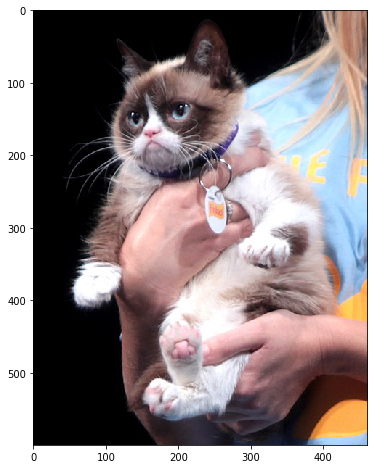

In [31]:
plt.imshow(grumpy);

The semicolon at the end of the previous statement prevents the results of the function to be written to output. 

If we load more then one image then we can store them in four-dimensional array of shape (N_images, height, width,3) 

And finally  we usually divide the data in batches. That would give us a five-dimensional array (N_batches, N_images_in_batch, height, width, 3). You will encounter more examples as we progress. 

## Creating tensors

Above we have seen many examples of functions creating tensors.  All of them  initialize the elements of the array. Either with random numbers or a constant like zero or one. When we want to imediatelly assign other value to an tensor this is wasteful. For this we have yet another function that creates an empty, that is uninitialized array:

In [32]:
np.empty((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

All of those tensor creation functions also take a shape argument. Some of them have a version which takes another array as an "blueprint"

In [33]:
x = np.ones((2,4))
y = np.zeros_like(x)
y.shape

(2, 4)

0Yet another option is to create numpy arrays out of Python data structures: list, tuples using `array` or `asarray`.

In [34]:
np.asarray([0,0])

array([0, 0])

In [35]:
np.array((0,0))

array([0, 0])

In [36]:
np.array([[0,1],[1,0]])

array([[0, 1],
       [1, 0]])

For more information see [Array creation](https://docs.scipy.org/doc/numpy/user/basics.creation.html#arrays-creation).

## Array data type

Arrays do not only have shape but also data type for its elements which can be queried using the attribute `dtype' 

In [37]:
d = np.ones(3)
d.dtype

dtype('float64')

As you can see the default type for floating point arrays is double precision (64bit)

In [38]:
r = np.arange(10)
r.dtype

dtype('int32')

and for integer typye it is 64bit int. Some creation function accept the `dtype`   argument:

In [39]:
f = np.ones(3, dtype='float32')
f.dtype

dtype('float32')

In [40]:
i = np.ones(3, dtype='int32')
i.dtype

dtype('int32')

In [41]:
rf = np.arange(10, dtype='float32')
rf.dtype

dtype('float32')

For functions that do not provide `dtype` argument we have to use `astype` array method

In [42]:
rnd_f = np.random.uniform(size=10).astype('float32')
rnd_f.dtype

dtype('float32')

`astype` returns a copy of the array with appriopriate data type:

In [43]:
ri = np.arange(10)
rf = ri.astype('float32')

`ri` and `rf` are two distinct arrays. 

The types are important because some functionality  requires a specific data type. For example we can only use integer arrays to index other arrays. 

More importantly GPU  uses float32 arithmetics and so most of the DeepLearning packages expect float32 dtype. Even if they hadle the conversion themself we waste lot of memory by using the float64.  

## Indexing and slicing

We index the individual elements of the tensor by providing the values for all of its indices. As in C/C++ the indices start from zero. To access red chanel of the upper left pixel we use

In [44]:
grumpy[0,0,0]

0

The greatest value an index can have its size of its dimension minus one. The code below access red chanel of the lower right pixel. 

In [45]:
grumpy[599,460,0]

146

This requires us to remember the size of all dimensions. However we can index counting from the back:

In [46]:
grumpy[-1,-1,0]

146

One can understand this as substracting from the dimension size.

In [47]:
gs= grumpy.shape
grumpy[gs[0]-1,gs[1]-1,0]

146

If we do not specify all indices a subtensor is returned. That way we acces a whole pixel:

In [48]:
pixel = grumpy[0,0]
print(pixel.shape)
pixel

(3,)


array([0, 0, 0], dtype=uint8)

and that way a row:

In [49]:
row = grumpy[0]
print(row.shape)
print(row)

(461, 3)
[[  0   0   0]
 [  0   0   0]
 [  0   0   0]
 ...
 [149 107  91]
 [140 101  84]
 [139 103  87]]


What if we want to skip indices which are not at the end? For example how we access a single column? This can be achieved using slice notation. We mark the missing index by a colon ':'. Here we access first column:

In [50]:
column = grumpy[:,0]
print(column.shape)
column

(600, 3)


array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

and here the blue chanel:

(600, 461)


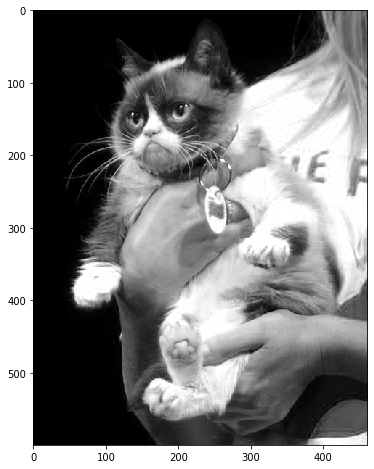

In [51]:
chanel = grumpy[:,:,2]
print(chanel.shape)
plt.imshow(chanel, cmap='gray');

The ':' is in fact a special case of the more general notation. The general  slice has the format


```
start:end:step
```

which denotes values of the index starting at `start` then increasing by `step` until it is equal or greater then `end`. This means that the `end` is not included in this range. When omited, `start` defaults to zero, `end` to size and `step` to one.
Single colon ':' is equivalent to `0:size:1`.   

Here we take a portion of the photo:

(100, 100, 3)


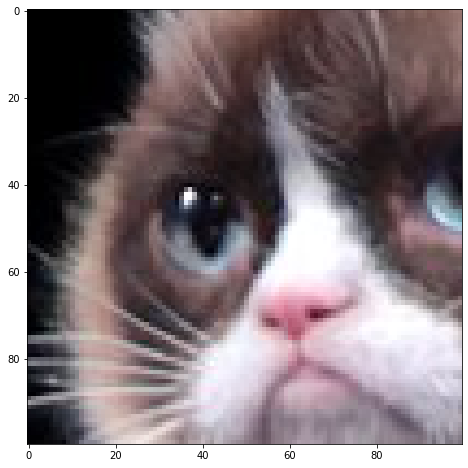

In [52]:
sub = grumpy[100:200, 100:200]
print(sub.shape)
plt.imshow(sub);

And here we take every eight pixel:

(75, 58, 3)


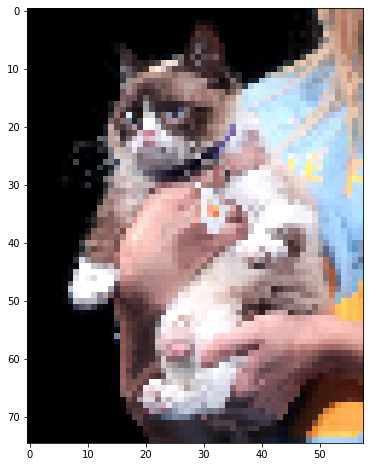

In [53]:
small = grumpy[::8, ::8]
print(small.shape)
plt.imshow(small);

A frequent idiom is reversing the array along one dimension by using negative steps:

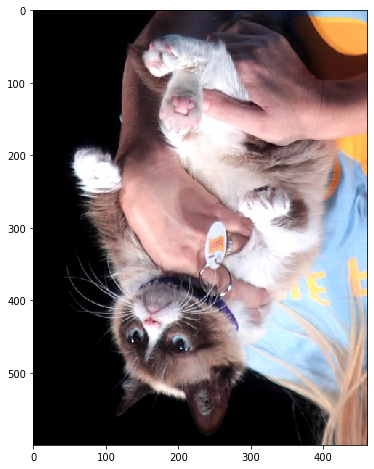

In [54]:
plt.imshow(grumpy[::-1])

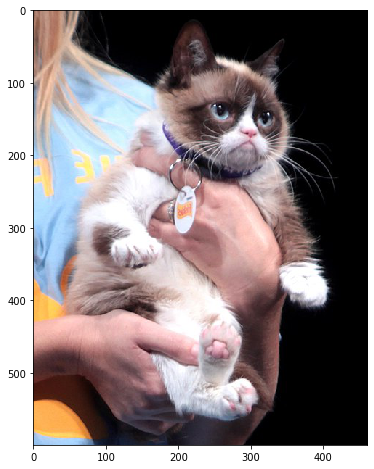

In [55]:
plt.imshow(grumpy[:,::-1])

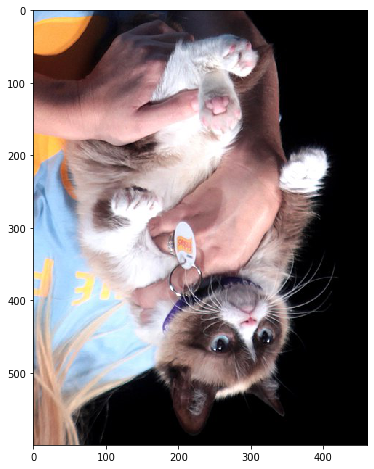

In [56]:
plt.imshow(grumpy[::-1,::-1])

Please play with slicing until you are confident that you have mastered this notation. 

## Copies, views, references and asignment

It's very important to understand when we are dealing with copies of arrays and when with references to them or views.

### References

The line below formaly creates a new ten-element array and stores reference to it in variable x: 

In [57]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Assignment in Python, like in Java, only copies the references creating an alias for x,

In [58]:
y = x

After this assignement both variables x and y point to the same object, which we can check by using the operator `is`:

In [59]:
y is x

True

So changing array trough one reference will change same array as pointed by the other:

In [60]:
y[0]=10
x

array([10,  1,  2,  3,  4,  5,  6,  7,  8,  9])

However assigning a new array to y will replace the reference and the original x array will be unaffected: 

In [61]:
y = np.zeros_like(x)
x

array([10,  1,  2,  3,  4,  5,  6,  7,  8,  9])

### Views

Assigning references is not the only way we can create an alias. Many, if not most, of the tensor operations creates co called **views** of the array. A view is a array that shares memory with another array. When taking slices of the array we actually creating a view.

In [62]:
x_view = x[:]
x_view

array([10,  1,  2,  3,  4,  5,  6,  7,  8,  9])

now the x and x_view point to distinct objects

In [63]:
x_view is x

False

but share the underlaying arrays. Assigning to `x_view` will change `x`

In [64]:
x_view[6] = 42
x

array([10,  1,  2,  3,  4,  5, 42,  7,  8,  9])

A view holds a reference to original array which we can retrieve using `base` property:

In [65]:
x_view.base

array([10,  1,  2,  3,  4,  5, 42,  7,  8,  9])

while the original array has base None 

In [66]:
print(x.base)

None


Of course we can use any slice: 

In [67]:
x_half = x[::2]
x_half[:] = 7
x

array([7, 1, 7, 3, 7, 5, 7, 7, 7, 9])

Please note an technical but important point. Why we could n ot just write `x_half=7` but used `x_half[:]=7` instead? Let's check:

In [68]:
x_half=8
x

array([7, 1, 7, 3, 7, 5, 7, 7, 7, 9])

In [69]:
x_half

8

`x_half` is a variable holding reference to a python object which happens to be a view (ndarray). Assignment `x_half=8` just stores number 8 in this variable, replacing the array reference. The slice notation forces the elementwise assignment. 

Of course we can use slices directly without using the intermediate references:

In [70]:
x[1::3]=3
x

array([7, 3, 7, 3, 3, 5, 7, 3, 7, 9])

### Copy

A physical (deep) copy is provided by the copy method of the array:

In [71]:
grumpy_copy  =  grumpy.copy()

Now changing the copy does not change the original:

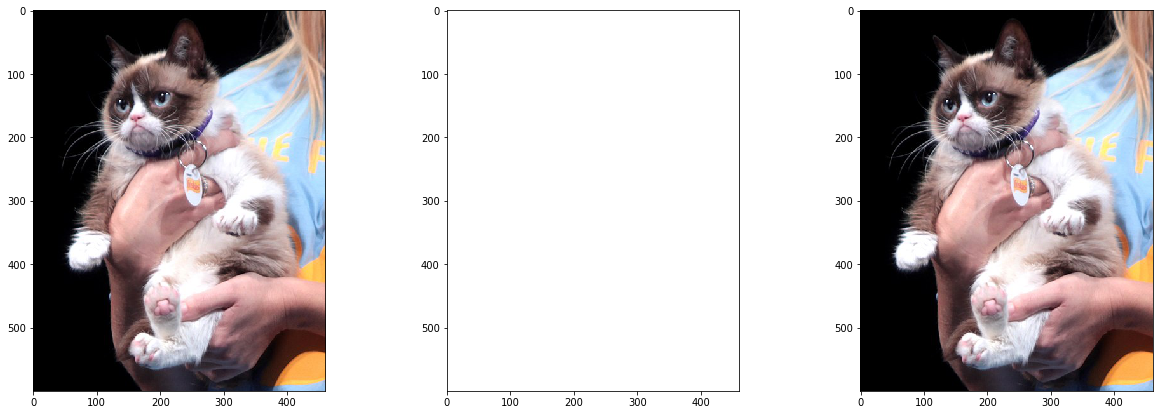

In [72]:
fig, ax = plt.subplots(1,3, figsize=(21,7))
ax[0].imshow(grumpy_copy);
grumpy_copy[:,:,:] = np.ones_like(grumpy_copy)*255
ax[1].imshow(grumpy_copy);
ax[2].imshow(grumpy);

We can use slices to selectively alter a part of the picture:

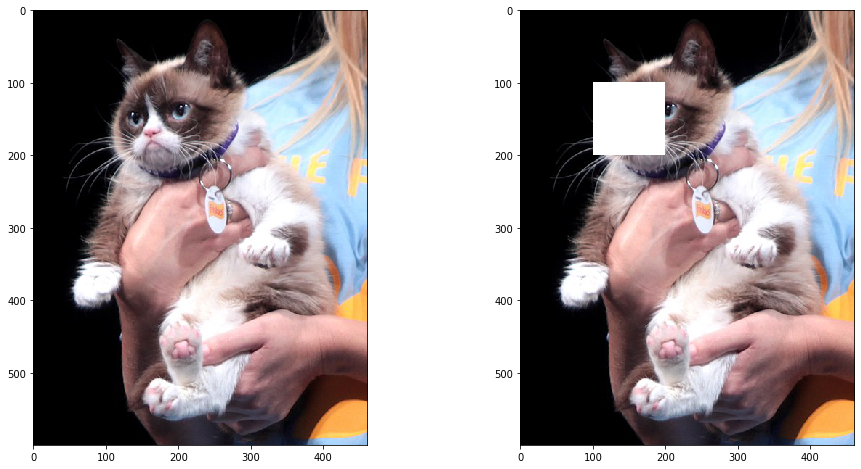

In [73]:
grumpy_copy = grumpy.copy()
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].imshow(grumpy_copy);
grumpy_copy[100:200, 100:200]=np.array([255,255,255])
ax[1].imshow(grumpy_copy);

But again this has changed only the copy:

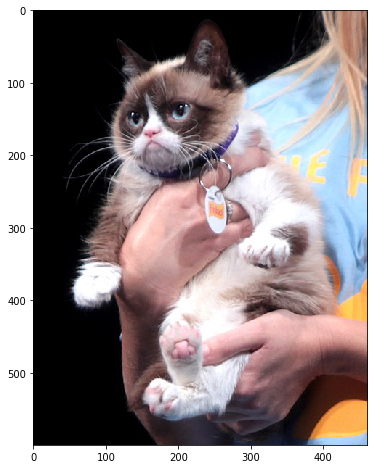

In [74]:
plt.imshow(grumpy);

## Saving and loading

 Array can be saved to disk using `save` function

In [75]:
np.save('grumpy.npy', grumpy)

and loaded back

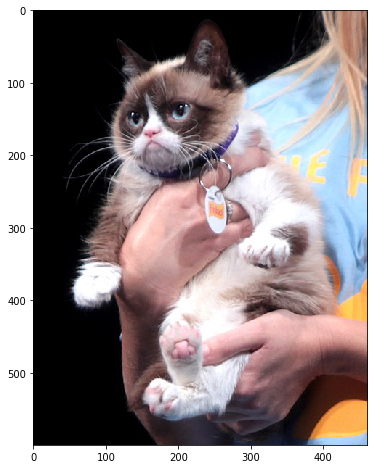

In [76]:
another_grumpy = np.load('grumpy.npy')
plt.imshow(another_grumpy);

This concludes a very brief introduction to `numpy` arrays. In the next section we will show how to manipulate  and change the shape of the arrays. 